# Final rubric

Imagine a box with N particles inside. These particles are of three types, called A,B,C. Every
time two particles of different type hit each other, they both get transformed into the 3rd type.
Investigate

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from random import randint
import time
from itertools import combinations

## First attempt

Looking for stability for individual arrays 

In [2]:
'''
Perform transformations on the array for up to max_interactions
Stops early if the array becomes stable and returning the array, othwerwise return None
'''
def simulate_transformations(initial_array, max_interactions):
    # Copy the initial array to avoid modifying the original
    array = np.array(initial_array)
    
    #select random elements in the array
    for _ in range(max_interactions):
        i, j = randint(0, len(array) - 1), randint(0, len(array) - 1)
        while i == j:
            j = randint(0, len(array) - 1)
        
        if array[i] != array[j]:
            # Determine the new type based on the interaction rules
            if {'A', 'B'} == {array[i], array[j]}:
                new_type = 'C'
            elif {'A', 'C'} == {array[i], array[j]}:
                new_type = 'B'
            elif {'B', 'C'} == {array[i], array[j]}:
                new_type = 'A'
            array[i], array[j] = new_type, new_type
        
        if np.all(array == array[0]):
            #The array has become stable
            return array
        
    #If the array did not become stable within max_interactions
    return None  

'''
Run simulations on the given initial_array, applying up to max_interactions each time
Return the number of stable cases
'''
def run_simulations(initial_array, max_interactions, num_simulations):
    #Initialise stable_count
    stable_count = 0
    for _ in range(num_simulations):
        result = simulate_transformations(initial_array, max_interactions)
        if result is not None:
            stable_count += 1
    
    return stable_count

In [3]:
# Example usage with an initial array of characters 'A', 'B', 'C'
initial_array = ['A', 'B', 'C', 'A', 'B', 'C'] 

# Maximum number of interactions per simulation
max_interactions = 20  
# Number of simulations to run
num_simulations = 100  

stable_outcomes = run_simulations(initial_array, max_interactions, num_simulations)
print(f"Number of stable outcomes: {stable_outcomes} out of {num_simulations}")

Number of stable outcomes: 50 out of 100


In [4]:
#Plot the stability given a single array
def plot_stable_outcomes(stable_outcomes, N):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, N + 1), stable_outcomes, marker='o', linestyle='-', color='blue')
    plt.title(f'Number of Stable Outcomes Across {N} Attempts')
    plt.xlabel('Attempt')
    plt.ylabel('Number of Stable Outcomes')
    plt.xticks(range(1, N + 1))
    plt.grid(True)
    plt.show()

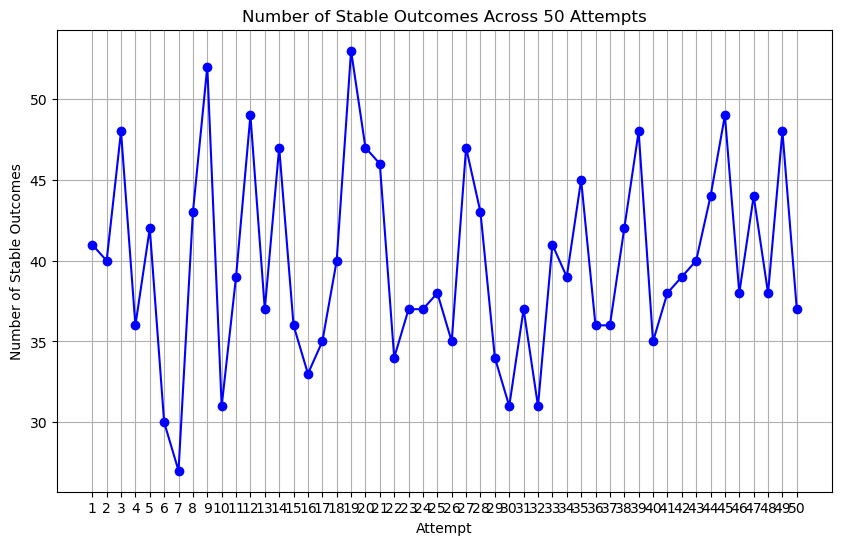

In [5]:
# Example usage configuration using same array, max_interactions and num_simulations as above 

# Number of attempts
N = 50 

# Simulate the process
count_stability = []
for _ in range(N):
    stable_outcomes = run_simulations(initial_array, max_interactions, num_simulations)
    count_stability.append(stable_outcomes)

# Plot the outcomes
plot_stable_outcomes(count_stability, N)

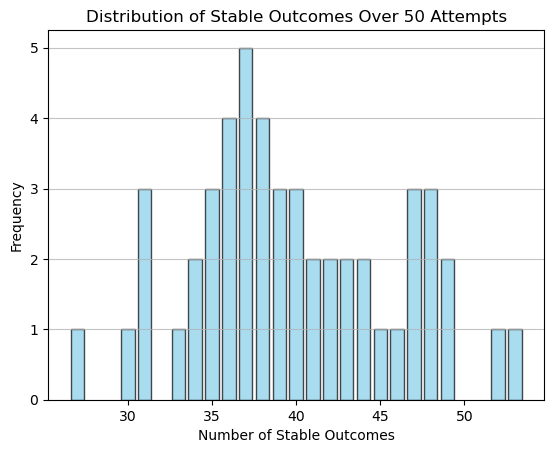

In [6]:
#analyse frequency of stability cases
unique, frequency = np.unique(count_stability, return_counts = True)
#print(frequency)
#print(unique)

plt.bar(unique, frequency, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Stable Outcomes Over {N} Attempts')
plt.xlabel('Number of Stable Outcomes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Section 1)

### with permutations

Use the print command to compare the number of combinations computed without considering reordering.

In [7]:
def generate_combinations(n, last_char='A', current_combination=None, results=None):
    if results is None:
        results = []
    if current_combination is None:
        current_combination = []

    # Base case: when the combination reaches the desired length
    if len(current_combination) == n:
        results.append(current_combination.copy())
        return results

    for char in ['A', 'B', 'C']:
        # Only add the character if it follows the non-decreasing order
        if char >= last_char:
            generate_combinations(n, char, current_combination + [char], results)

    # Return results only when the recursion unwinds back to the first call
    return results

In [8]:
# Example usage
number = 6
combinations = generate_combinations(number)
#print(len(combinations))
for combination in combinations:
    print(combination)

['A', 'A', 'A', 'A', 'A', 'A']
['A', 'A', 'A', 'A', 'A', 'B']
['A', 'A', 'A', 'A', 'A', 'C']
['A', 'A', 'A', 'A', 'B', 'B']
['A', 'A', 'A', 'A', 'B', 'C']
['A', 'A', 'A', 'A', 'C', 'C']
['A', 'A', 'A', 'B', 'B', 'B']
['A', 'A', 'A', 'B', 'B', 'C']
['A', 'A', 'A', 'B', 'C', 'C']
['A', 'A', 'A', 'C', 'C', 'C']
['A', 'A', 'B', 'B', 'B', 'B']
['A', 'A', 'B', 'B', 'B', 'C']
['A', 'A', 'B', 'B', 'C', 'C']
['A', 'A', 'B', 'C', 'C', 'C']
['A', 'A', 'C', 'C', 'C', 'C']
['A', 'B', 'B', 'B', 'B', 'B']
['A', 'B', 'B', 'B', 'B', 'C']
['A', 'B', 'B', 'B', 'C', 'C']
['A', 'B', 'B', 'C', 'C', 'C']
['A', 'B', 'C', 'C', 'C', 'C']
['A', 'C', 'C', 'C', 'C', 'C']
['B', 'B', 'B', 'B', 'B', 'B']
['B', 'B', 'B', 'B', 'B', 'C']
['B', 'B', 'B', 'B', 'C', 'C']
['B', 'B', 'B', 'C', 'C', 'C']
['B', 'B', 'C', 'C', 'C', 'C']
['B', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'C', 'C']


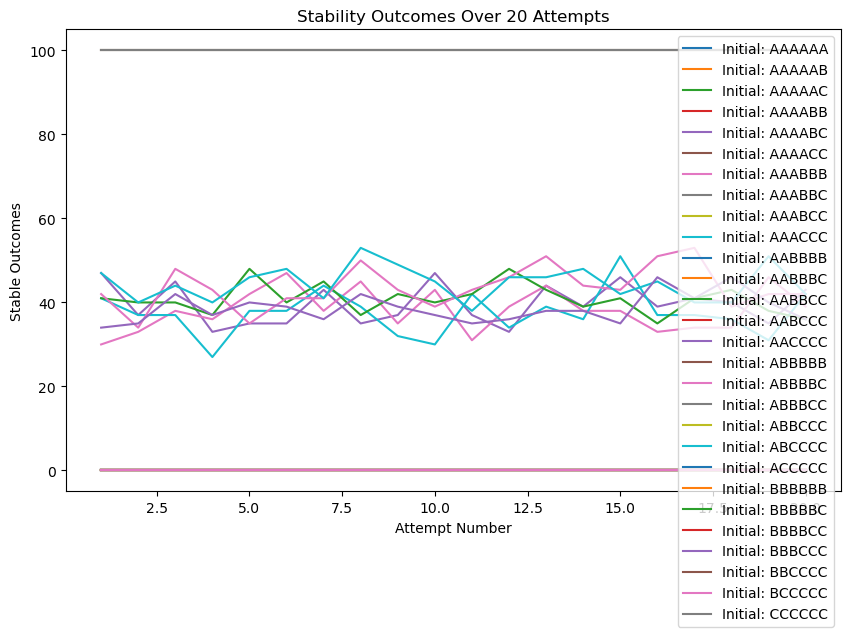

In [9]:
# Initialize a list to hold stability counts for each initial condition
count_stability = [[] for _ in combinations]

#define attempts to run the code
attempts = 20 

for index, initial in enumerate(combinations):
    for _ in range(attempts):
        stable_outcomes = run_simulations(initial, max_interactions, num_simulations)
        # Append results to the corresponding list
        count_stability[index].append(stable_outcomes)  

# Plotting all results together
x_values = list(range(1, attempts + 1))  # Common x-axis for all simulations
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Iterate over each set of stability outcomes to plot them
for i, stability_data in enumerate(count_stability):
    # Convert list of characters to a readable format for the label
    label = 'Initial: ' + ''.join(combinations[i])
    plt.plot(x_values, stability_data, label=label)

plt.title(f'Stability Outcomes Over {attempts} Attempts')
plt.xlabel('Attempt Number')
plt.ylabel('Stable Outcomes')
# Show legend to differentiate each initial condition
plt.legend()  
plt.show()

### without permutations
Use the print command to compare the number of combinations computed without considering reordering.

In [10]:
def unique_combinations(N):
    combinations = []
    for c in range(N):
        for b in range(c, N): 
            # Start from a to ensure a <= b
            a = N - c - b
            # Ensure b <= c to avoid duplicates and maintain order
            if a >= b:
                # Skip combinations where all numbers are the same
                if not (a == N or b == N or c==N):  
                    combinations.append([a, b, c])
    return combinations

combinations = unique_combinations(number)

In [11]:
# Example usage
#print(len(combinations))
if len(combinations)<=12:
    for combination in combinations:
        print(combination)
else:
    print(combinations)

[5, 1, 0]
[4, 2, 0]
[3, 3, 0]
[4, 1, 1]
[3, 2, 1]
[2, 2, 2]


In [12]:
#transform the unique combinations in A,B,C
def unique_arrays(comb):
    arrays = []
    for single in combinations:
        Na, Nb, Nc = single
        array = ['A' for _ in range(Na)] + ['B' for _ in range(Nb)] + ['C' for _ in range(Nc)]
        arrays.append(array)
    return arrays

In [13]:
#Example usage
combs = unique_arrays(combinations)

#print(len(combs))
if len(combs)<=12:
    for comb in combs:
        print(comb)
else:
    print(combs)

['A', 'A', 'A', 'A', 'A', 'B']
['A', 'A', 'A', 'A', 'B', 'B']
['A', 'A', 'A', 'B', 'B', 'B']
['A', 'A', 'A', 'A', 'B', 'C']
['A', 'A', 'A', 'B', 'B', 'C']
['A', 'A', 'B', 'B', 'C', 'C']


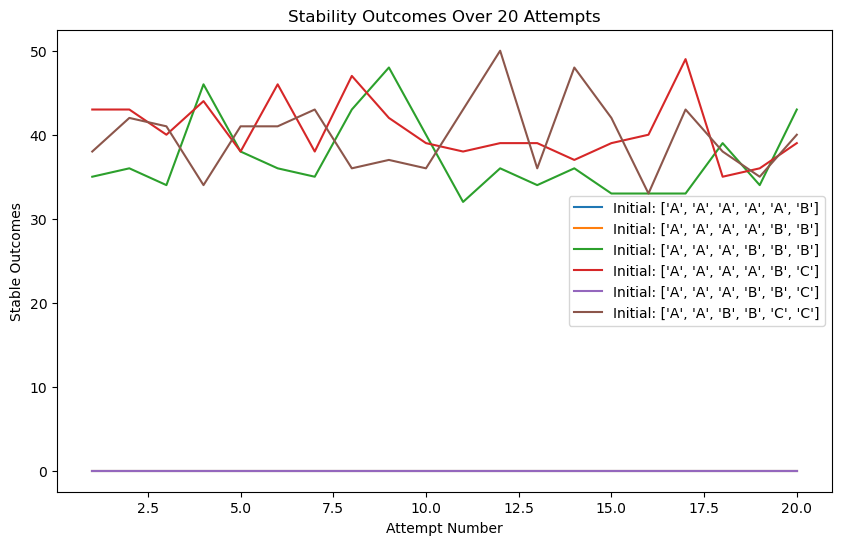

The number of initial conditions not reaching stability is:  3
And the initial conditions that did not reach stability:
['A', 'A', 'A', 'A', 'A', 'B']
['A', 'A', 'A', 'A', 'B', 'B']
['A', 'A', 'A', 'B', 'B', 'C']


In [14]:
# Initialize a list to hold stability counts for each initial condition
count_stability = [[] for _ in combs]

# Initialize a list to keep track of initial conditions that do not reach stability
non_stable_combs = []

for index, initial in enumerate(combs):
    for _ in range(attempts):
        stability_achieved = True
        
        stable_outcomes = run_simulations(initial, max_interactions, num_simulations)
        # Append results to the corresponding list
        count_stability[index].append(stable_outcomes)          
        
        if stable_outcomes == 0:
            # Flag as not stable if any outcome is non-zero
            stability_achieved = False  
            
    if not stability_achieved:
        # Add to list if stability was not achieved
        non_stable_combs.append(initial) 


#Plotting all results together
x_values = list(range(1, attempts + 1))  # Common x-axis for all simulations

plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Iterate over each set of stability outcomes to plot them
for i, stability_data in enumerate(count_stability):
    plt.plot(x_values, stability_data, label=f'Initial: {combs[i]}')

plt.title(f'Stability Outcomes Over {attempts} Attempts')
plt.xlabel('Attempt Number')
plt.ylabel('Stable Outcomes')
plt.legend()  # Show legend to differentiate each initial condition
plt.show()

# Output the initial conditions that did not reach stability
print("The number of initial conditions not reaching stability is: ", len(non_stable_combs))
print("And the initial conditions that did not reach stability:")
for comb in non_stable_combs:
    print(comb)

## Section 2)

### Monte Carlo Method

In [15]:
def calculate_probabilities(count_stability, num_simulations):
    # Calculate the probability of stability for each initial condition
    probabilities = [np.average(stability) / num_simulations for stability in count_stability]
    return probabilities

In [16]:
# Example usage
probabilities = calculate_probabilities(count_stability, num_simulations)


# Display probabilities:
for i, prob in enumerate(probabilities):
    print(f"Probability of stability for {combs[i]}: {prob:.4f}")

Probability of stability for ['A', 'A', 'A', 'A', 'A', 'B']: 0.0000
Probability of stability for ['A', 'A', 'A', 'A', 'B', 'B']: 0.0000
Probability of stability for ['A', 'A', 'A', 'B', 'B', 'B']: 0.3720
Probability of stability for ['A', 'A', 'A', 'A', 'B', 'C']: 0.4055
Probability of stability for ['A', 'A', 'A', 'B', 'B', 'C']: 0.0000
Probability of stability for ['A', 'A', 'B', 'B', 'C', 'C']: 0.3985


In [17]:
#st = time.time()

avg_prob =[]
for i in range(2, number+1):
    #print('For length ', i)
    #create unique number combinations
    combinations = unique_combinations(i)
    #create unique character combinations
    combs = unique_arrays(combinations)
    
    
    #Calculate number of stabilities
    count_stability = [[] for _ in combs]
    for index, initial in enumerate(combs):
        for _ in range(attempts):
            stable_outcomes = run_simulations(initial, max_interactions, num_simulations)
            count_stability[index].append(stable_outcomes)  
    
    #calculate probabilities
    probabilities = calculate_probabilities(count_stability, num_simulations)
        
    # Calculate and print the average probability for the current length N
    average_probability = np.mean(probabilities)
    avg_prob.append(average_probability)
    print(f"Average probability of stability for length {i}: {average_probability:.4f}\n")
 
'''
#get the execution time
et = time.time()
elapsed_time = et - st
print('Execution time using for loops over list:', elapsed_time, 'seconds')
'''

Average probability of stability for length 2: 1.0000

Average probability of stability for length 3: 0.5000

Average probability of stability for length 4: 0.6072

Average probability of stability for length 5: 0.2679

Average probability of stability for length 6: 0.1986



"\n#get the execution time\net = time.time()\nelapsed_time = et - st\nprint('Execution time using for loops over list:', elapsed_time, 'seconds')\n"

Notice that with $N =10$ the time taken to develope this code is almost 1min.

With $N = 50$ the time taken is 664s or 11min.
 
With $N = 100$ the time taken is 5015s or 1h 24min. 
 
Might be useful to lower the number of max_interactions, num_simulations and attempts, and maybe avoiding printing all the possible combinations for large numbers.

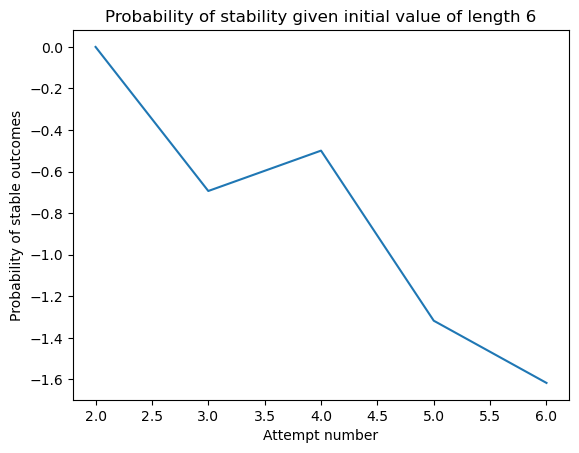

In [18]:
#plot average probabilities
plt.plot(range(2,number+1), np.log(avg_prob))
plt.title(f"Probability of stability given initial value of length {number}")
plt.xlabel('Attempt number')
plt.ylabel('Probability of stable outcomes')
plt.show()